In [8]:
# importing dependencies
using CSV
using SpecialFunctions
using DataFrames
using Plots

In [9]:
@time begin
# Initial parameters
n0 = 1.0
v0 = 1.0
G = 1.0  # Growth rate
beta = 1.0  # Aggregation kernel
a = 1.0  # Breakage kernel
D0 = 0.5  # Internal dispersion coefficient
D2 = 0.5  # Internal dispersion coefficient
N = 3  # Order of approximation / number of nodes

# Initialization of moments
m_init = zeros(2 * N)
for i in 1:2 * N
    m_init[i] = n0 * v0^((i-1) / 3) * gamma(1 + (i-1) / 3)
end

# Analytical solutions for size-independent growth (Marchisio paper 2004)
function size_indep_growth(t_values, m_init, G, n0)
    # Define moments as functions of time
    m0(t) = m_init[1] 
    m1(t) = m_init[2] + G * n0 * t
    m2(t) = m_init[3] + G^2 * n0 * t^2 + 2 * G * m_init[2] * t
    m3(t) = m_init[4] + G^3 * n0 * t^3 + 3 * G^2 * m_init[2] * t^2 + 3 * G * m_init[3] * t
    m4(t) = m_init[5] + G^4 * n0 * t^4 + 4 * G^3 * m_init[2] * t^3 + 6 * G^2 * m_init[3] * t^2 + 4 * G * m_init[4] * t
    m5(t) = m_init[6] + G^5 * n0 * t^5 + 5 * G^4 * m_init[2] * t^4 + 10 * G^3 * m_init[3] * t^3 + 10 * G^2 * m_init[4] * t^2 + 5 * G * m_init[5] * t
    moments = [m0, m1, m2, m3, m4, m5]
    results = [moment.(t_values) for moment in moments]
    return results
end

# Analytical solution for constant aggregation kernel (Marchisio paper 2004)
function const_aggreg(t_values, m_init, n0, beta)
    # Define moments as functions of time
    m0(t) = m_init[1] * (2.0 / (2.0 + n0 * beta * t))^(1.0 - 0 / 3.0)
    m1(t) = m_init[2] * (2.0 / (2.0 + n0 * beta * t))^(1.0 - 1 / 3.0)
    m2(t) = m_init[3] * (2.0 / (2.0 + n0 * beta * t))^(1.0 - 2 / 3.0)
    m3(t) = m_init[4] * (2.0 / (2.0 + n0 * beta * t))^(1.0 - 3 / 3.0)
    m4(t) = m_init[5] * (2.0 / (2.0 + n0 * beta * t))^(1.0 - 4 / 3.0)
    m5(t) = m_init[6] * (2.0 / (2.0 + n0 * beta * t))^(1.0 - 5 / 3.0)
    moments = [m0, m1, m2, m3, m4, m5]
    results = [moment.(t_values) for moment in moments]
    return results
end

# Analytical solutions for size-dependent growth: 1\L (Marchisio paper 2004)
function size_dep_growth(t_values, m_init, G)
    # Define moments as functions of time
    m0(t) = m_init[1] 
    m2(t) = m_init[3] + 2 * G * m_init[1] * t
    m4(t) = m_init[5] + 4 * G * t * (G * m_init[1] * t + m_init[3])
    moments = [m0, m2, m4]
    results = [moment.(t_values) for moment in moments]
    return results
end
end

  0.000340 seconds (562 allocations: 41.157 KiB)


size_dep_growth (generic function with 1 method)

In [10]:
@time begin
#saving the data in the csv format 

#For plotting the Analytical Solutions
t_values = 0:0.001:10.0
moments_list = size_indep_growth(t_values, m_init, G, n0)
moments_list_float64 = [float.(moment) for moment in moments_list]

# Write results to CSV for size independent 
csv_filename = "size_independent_data_anajl.csv"
CSV.write(csv_filename, DataFrame(hcat(moments_list_float64...), :auto))
println("Data written to $csv_filename")

println("*************")
t_values = 0:0.001:10.0
moments_list = size_dep_growth(t_values, m_init, G)
moments_list_float64 = [float.(moment) for moment in moments_list]

# Write results to CSV
csv_filename = "size_dependent_data_anajl.csv"
CSV.write(csv_filename, DataFrame(hcat(moments_list...), :auto))

println("Data written to $csv_filename")
println("*************")
# Get the moments
t_values = 0:0.001:10.0
moments_list = const_aggreg(t_values, m_init, n0, beta)
moments_list_float64 = [float.(moment) for moment in moments_list]

# # Write results to CSV
csv_filename = "moments_data_const_aggreg_anajl.csv"
CSV.write(csv_filename, DataFrame(hcat(moments_list...), :auto))
println("Data written to $csv_filename")
end

Data written to size_independent_data_anajl.csv
*************
Data written to size_dependent_data_anajl.csv
*************
Data written to moments_data_const_aggreg_anajl.csv
  1.082616 seconds (2.31 M allocations: 138.897 MiB, 3.20% gc time, 92.77% compilation time)


******************Size independent growth rate************************


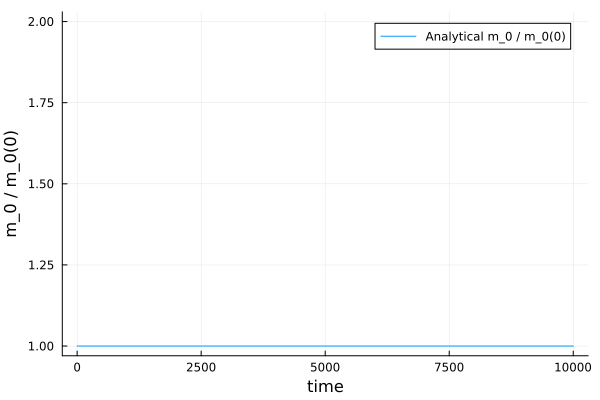

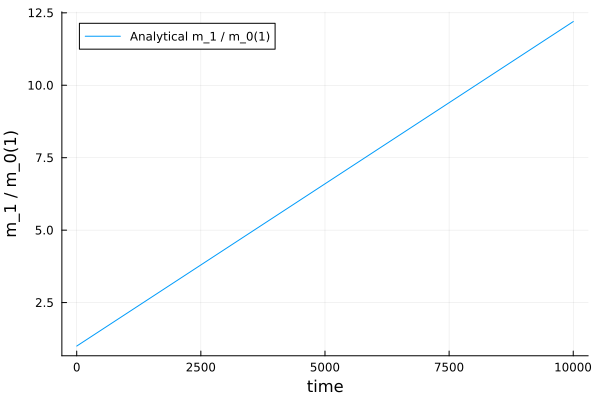

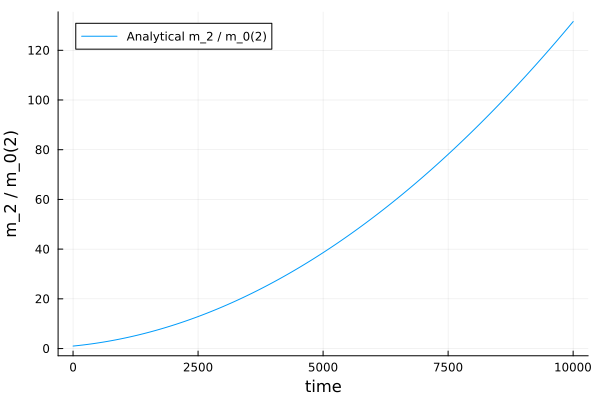

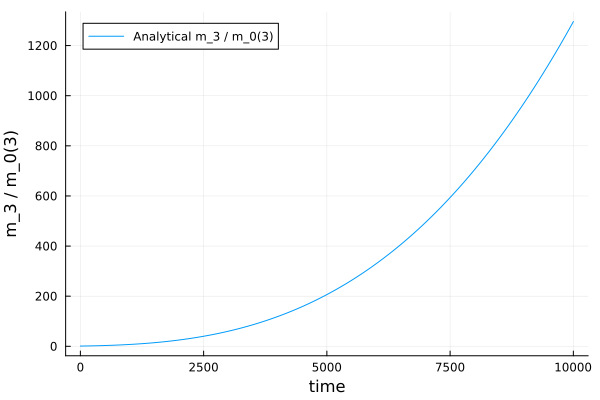

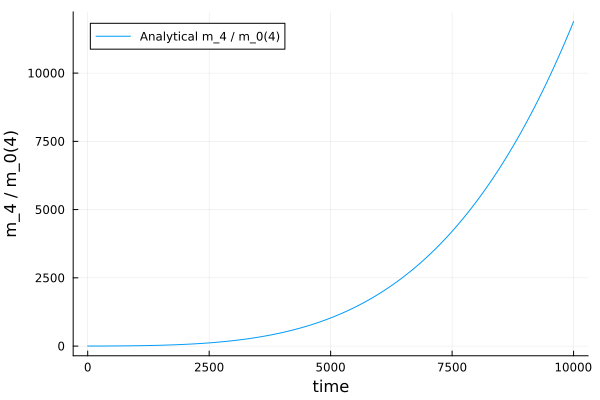

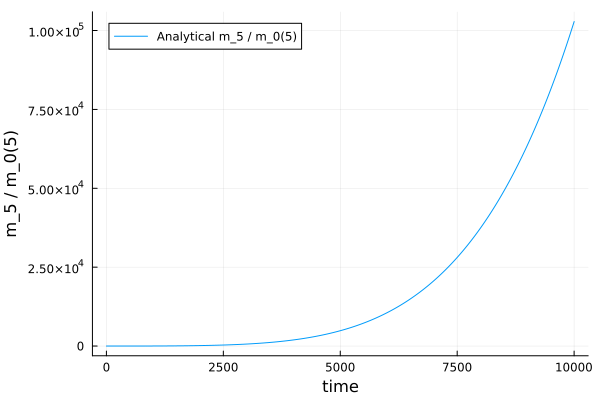

  1.115809 seconds (6.25 M allocations: 128.656 MiB, 3.80% gc time)


In [11]:
@time begin
println("******************Size independent growth rate************************")

df = CSV.File("size_independent_data_anajl.csv") |> DataFrame

# Iterate over columns and plot
for i in 1:length(names(df))
    column_name = names(df)[i]
    constant = m_init[i]
    
    # Convert the y-axis data to a numerical type
    y_data = df[!, column_name] / constant

    
    plot(1:size(df, 1), y_data, label=" Analytical m_$(i-1) / m_0($(i-1))")
    # Add labels and legend
    xlabel!("time")
    ylabel!("m_$(i-1) / m_0($(i-1))")
    

    # Show the plot
    display(Plots.plot!()) 
end
end

******************Size dependent growth rate************************


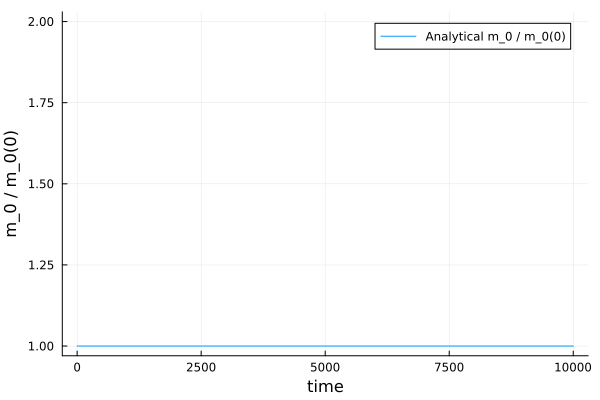

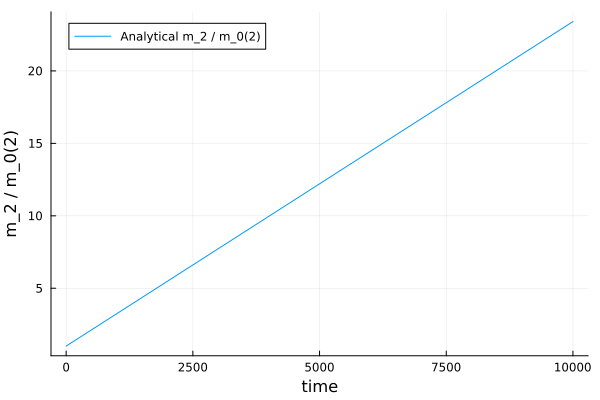

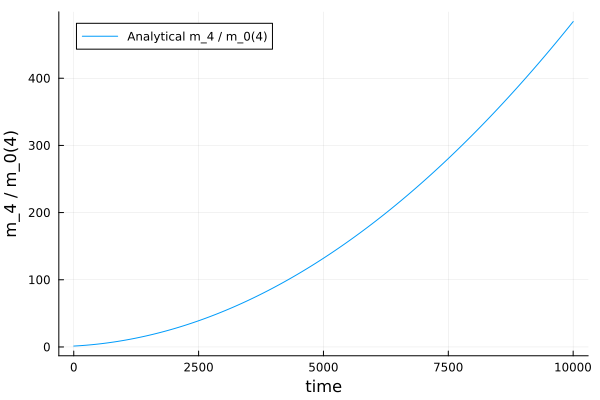

  0.521714 seconds (3.17 M allocations: 64.902 MiB, 1.13% gc time)


In [12]:
@time begin
println("******************Size dependent growth rate************************")

df = CSV.File("size_dependent_data_anajl.csv") |> DataFrame

# Iterate over columns and plot
for i in 1:length(names(df))
    column_name = names(df)[i]
    constant = m_init[i]
    
    # Convert the y-axis data to a numerical type
    y_data = df[!, column_name] / constant
    
     plot(1:size(df, 1), y_data, label=" Analytical m_$(2*(i-1)) / m_0($(2*(i-1)))")
    # Add labels and legend
    xlabel!("time")
    ylabel!("m_$(2*(i-1)) / m_0($(2*(i-1)))")
     
    # Show the plot    
    display(Plots.plot!()) 
end
end

******************Constant Aggregation kernel************************


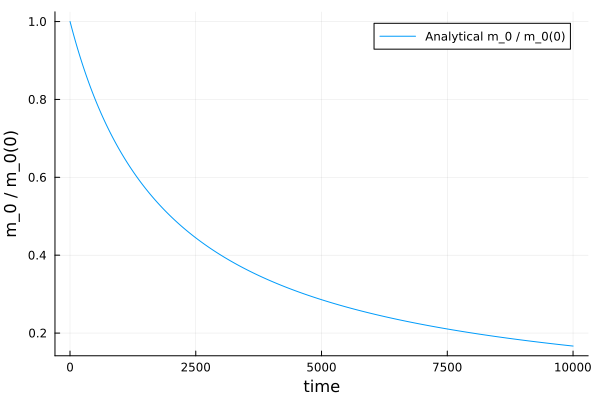

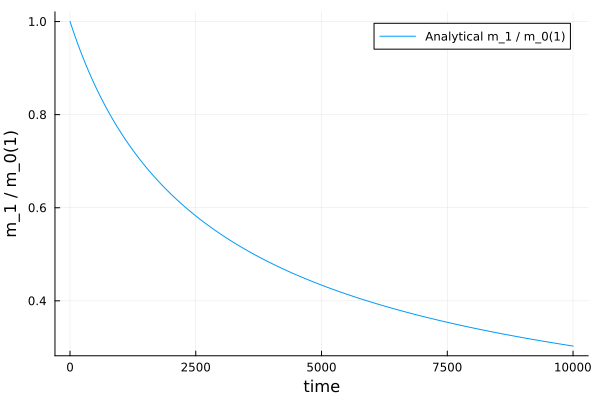

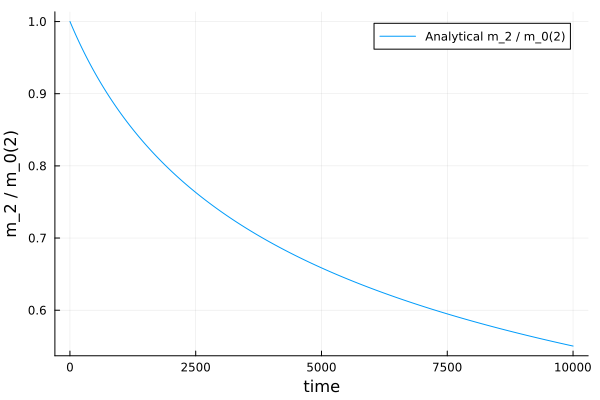

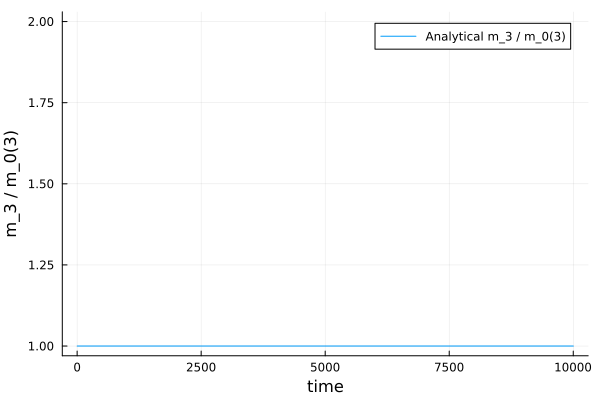

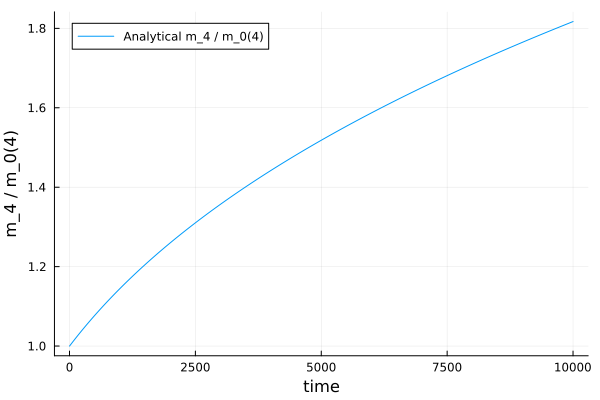

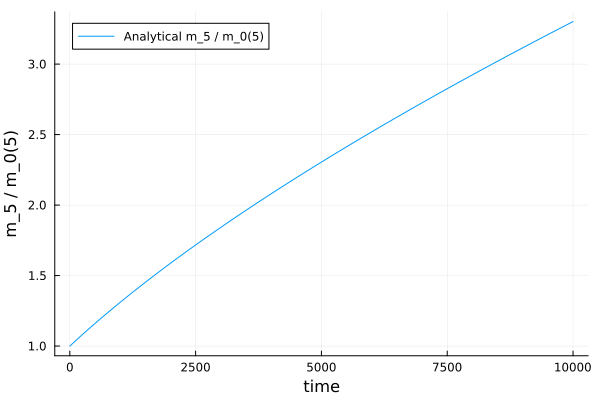

  1.033443 seconds (6.23 M allocations: 127.835 MiB, 1.61% gc time)


In [13]:
@time begin
println("******************Constant Aggregation kernel************************")

df = CSV.File("moments_data_const_aggreg_anajl.csv") |> DataFrame

# Iterate over columns and plot
for i in 1:length(names(df))
    column_name = names(df)[i]
    constant = m_init[i]
    
    # Convert the y-axis data to a numerical type
    y_data = df[!, column_name] / constant

    
    plot(1:size(df, 1), y_data, label=" Analytical m_$(i-1) / m_0($(i-1))")
    # Add labels and legend
    xlabel!("time")
    ylabel!("m_$(i-1) / m_0($(i-1))")
    

    # Show the plot
    display(Plots.plot!()) 
end
end